# Example N27-2

Get an overview of levee charcateristics for levee trajectory 27-2.

Thanks to package `GeoProfile` that allows to visualise geotechnical data in Python.

In [1]:
import os
import pickle
import pandas as pd
import numpy as np

import datetime

import logging
#logging.basicConfig(level=logging.WARNING)
#logging.basicConfig(level=logging.INFO)
# when logging level = DEBUG, skip messages from matplotlib and PIL
logging.basicConfig(level=logging.DEBUG)
for lib in ['rasterio', 'matplotlib', 'PIL', 'urllib3', 'choreographer', 'kaleido']:
    logging.getLogger(lib).setLevel(logging.INFO)


In [2]:
import hydropandas as hpd
hpd.__version__

'0.18.0'

In [3]:
import geoprofile
geoprofile.__version__

'0.4.0'

In [4]:
# TODO: De functies van `geolookup` staan nu allemaal in een .py bestand. Dit nog Python-ic maken. Met een init.py en verschillende sub besatanden
# TODO: geheel Object Oriented maken


In [5]:
import sys
sys.path.append(r'..\..\geolookup')

import functions as gl

# Gegevens openen

In [6]:
DATA_PATH = r'N27-2_data\\'
PLOT_PATH = r'N27-2_plots\\'

## CPTs

Downloaded from Broloket and classified via `CPTcore` using Robertson classification.

In [7]:
# TODO: change method to plot CPTs in section perpendicular to levee. Now data is projected using Waterschap Scheldestromen method to
# project CPTs relative to reference line (x=0). Therefore, preprocessing is done outside this repo.

In [8]:
region = 'Os'
dp_min = 725
dp_max = 1080
cpt_classification = 'Robertson'

fn = DATA_PATH + f'geoprofile_columns_robertson_{region}_dp{dp_min}-{dp_max}.pkl'
logging.info(f"File last modified: {datetime.datetime.fromtimestamp(os.path.getmtime(fn)) - datetime.datetime.now()}")
with open(fn, "rb") as f:
    geoprofile_cols = pickle.load(f)
gl.describe_columns(geoprofile_cols)

INFO:root:File last modified: -1 day, 17:30:01.016547
INFO:root:Number of columns: 1248
INFO:root:Dike pole range: dp726.6 - dp1081.5, total 759 unique dike poles.
INFO:root:Data X: centered at 64380 with span 13 km, Y: centered at 397930 with span 11 km


## Hectometer indicator

In [9]:
df_hm = pd.read_csv(DATA_PATH + f'table_dijkpalen_{region}_dp{dp_min}-{dp_max}.csv')
df_hm.dp.describe()

count     711.000000
mean      902.500000
std       102.696154
min       725.000000
25%       813.750000
50%       902.500000
75%       991.250000
max      1080.000000
Name: dp, dtype: float64

## Schematised levee profiles

In [10]:
df_profile = pd.read_csv(DATA_PATH + f'table_profielen_{region}_dp{dp_min}-{dp_max}.csv')
df_profile.head()

region     dp  ymv.bui  ysloot.1d  xmv.bin  xsloot.1a  xsloot.1c  xsloot.1d  \
0     Os  725.0   -0.253       -0.5   -91.13     -52.13     -50.79     -50.39   
1     Os  726.0   -0.583        0.0  -200.88     -97.88     -95.77     -92.82   
2     Os  727.0   -0.928        0.5   -51.22     -23.22     -21.81     -20.57   
3     Os  728.0   -0.926        0.5  -201.00     -24.00     -22.64     -22.60   
4     Os  729.0   -1.034        0.5  -201.00     -23.62     -22.34     -20.45   

   xsloot.1b  xweg.1  ...  yteen.1  yberm.1a  yberm.1b  ykruin.1  ykruin.2  \
0     -49.13  -25.13  ...     1.71      6.26      6.39      6.39      6.22   
1     -90.88  -18.88  ...     2.45      6.43      6.43      6.43      6.41   
2     -19.22  -19.22  ...     2.08      6.51      6.51      6.51      6.43   
3     -21.00  -21.00  ...     1.86      6.45      6.45      6.45      6.37   
4     -19.00  -19.00  ...     1.50      6.46      6.46      6.46      6.42   

   yberm.2a  yberm.2b  yteen.2  yweg.2  ysloot.2  
0      4.63      4.33     0.03   0.773    -0.071  
1      4.58      4.28     0.05  -0.700    -0.640  
2      4.53      4.27    -0.74  -0.776    -0.776  
3      4.44      4.23     0.26  -0.130    -0.929  
4      4.48      4.25    -0.76  -1.046    -0.936  

[5 rows x 37 columns]

## Section profiles

Distance along trajectory where drawing (section profile) is available.

In [11]:
if 0:
    dp_fig = 971.3
    dp_center = 971
    fn = df_section.loc[df_section.dp == dp_fig, 'dsn_file_tif'].values[0]

    print(fn)
    from plotly.subplots import make_subplots
    import plotly.io as pio

    figure = make_subplots(
            rows=1,
            cols=1,
            horizontal_spacing=0.01,
        )

    gl.plot_deltaversterking_background(figure, fn, dp=None, fig_row=1, fig_col=1, x_offset=-9)

    gl.select_and_plot_surfacelevelprofile(dp_center, figure, df_profile, delta_dp=0, region='Os', fig_row=1, fig_col=1)

    figure.update_xaxes(range=[-30, 20], row=1, col=1)

    pio.write_html(figure, file=r'c:\temp\test.html', auto_open=True)

In [12]:
df_section = pd.read_csv(DATA_PATH + f'table_deltaversterking_{region}_dp{dp_min}-{dp_max}.csv')
df_section['description'] = 'Deltaversterking'
df_section.dsn_file_tif = DATA_PATH + df_section.dsn_file_tif 

df_section['x_offset'] = 0
df_section.loc[df_section.dp == 725.5, 'x_offset'] = -8
df_section.loc[df_section.dp == 730.5, 'x_offset'] = 3
df_section.loc[df_section.dp == 736.5, 'x_offset'] = -5
df_section.loc[df_section.dp == 744.9, 'x_offset'] = -6
df_section.loc[df_section.dp == 753.1, 'x_offset'] = -5
df_section.loc[df_section.dp == 873.2, 'x_offset'] = -5
df_section.loc[df_section.dp == 940, 'x_offset'] = 5
df_section.loc[df_section.dp == 945, 'x_offset'] = 5
df_section.loc[df_section.dp == 950, 'x_offset'] = 7
df_section.loc[df_section.dp == 953, 'x_offset'] = -8
df_section.loc[df_section.dp == 956.8, 'x_offset'] = -9
df_section.loc[df_section.dp == 961.5, 'x_offset'] = -9
df_section.loc[df_section.dp == 964, 'x_offset'] = -9
df_section.loc[df_section.dp == 968.8, 'x_offset'] = -10
df_section.loc[df_section.dp == 971.3, 'x_offset'] = -9



df_section.head()

region     dp                                       dsn_file_tif  \
0     Os  725.5  N27-2_data\\deltaversterking\os0725-0778\doors...   
1     Os  730.5  N27-2_data\\deltaversterking\os0725-0778\doors...   
2     Os  734.5  N27-2_data\\deltaversterking\os0725-0778\doors...   
3     Os  736.5  N27-2_data\\deltaversterking\os0725-0778\doors...   
4     Os  744.9  N27-2_data\\deltaversterking\os0725-0778\doors...   

        description  x_offset  
0  Deltaversterking        -8  
1  Deltaversterking         3  
2  Deltaversterking         0  
3  Deltaversterking        -5  
4  Deltaversterking        -6

## Groundwater monitoring and time series
Using `HydroPandas`

In [13]:
#TODO: functie maken die ouderom netjes aangeeft, als > dag, in dagen, anders in uren, anders in minuten
fn = DATA_PATH + f'oc_gwl_{region}_dp{dp_min}-{dp_max}.pkl'
oc_gwl = hpd.read_pickle(fn)
logging.info(f"File last modified: {(datetime.datetime.fromtimestamp(os.path.getmtime(fn)) - datetime.datetime.now()).total_seconds() / 60:.2f} minutes")
gl.describe_oc(oc_gwl, expected_obs_interval=10)


INFO:root:File last modified: -261.61 minutes
INFO:root:Obs Collection has 85 monitoring wells, on 66 locations. First observation 2007-08-29, last observation 2025-11-22
INFO:root:Obs Collection has on average 1.1 years of observations per monitoring well, median 1.3 years. Assuming observations interval each 10 minutes.
INFO:root:Data X: centered at 64220 with span 13 km, Y: centered at 397920 with span 10 km
INFO:root:Index is unique.


## Broloket

In [14]:
# not all standpipes are in Broloket at the moment (work in progess, I know)
# standpipes that are in Broloket are downloaded, distances along and perpendicular to levee added
df_gmw = pd.read_csv(DATA_PATH + 'gmws_met_dp_en_afstanden.csv', index_col=0)
df_gmw = df_gmw.rename(columns={'screenTopPosition': 'screen_top',
                        'screenBottomPosition': 'screen_bottom',})

df_gmw = df_gmw.loc[(df_gmw.region == 'Os') & (df_gmw.dp >= 725) & (df_gmw.dp <= 1080), :].copy()

df_gmw = df_gmw.sort_values(by=['dp', 'distance_to_ref', 'screen_top'], ascending=[True, True, False])

# Extract the number of zeros after the first three characters (e.g., after 'GMW')
min_padding_zeros = (
    df_gmw.index.str[3:]
    .str.extract(r'^(0+)')[0]
    .str.len()
    .min()
)
print("Minimum number of padding zeros in index:", min_padding_zeros)

df_gmw['label'] = df_gmw.index.str.replace(
    r'^(GMW)(0{%d})' % min_padding_zeros, r'\1', regex=True
)

df_gmw['position'] = 'dummy' # to be filled later

print("Is index unique?", df_gmw.index.is_unique)
df_gmw.head()


Minimum number of padding zeros in index: 6
Is index unique? True


broId  tubeNumber constructionStandard  \
bro_identifier                                                        
GMW000000114193-1  GMW000000114193           1              NEN5766   
GMW000000114192-2  GMW000000114192           2              NEN5766   
GMW000000114192-1  GMW000000114192           1              NEN5766   
GMW000000114191-1  GMW000000114191           1              NEN5766   
GMW000000114194-2  GMW000000114194           2              NEN5766   

                  coordinateTransformation corrected  \
bro_identifier                                         
GMW000000114193-1           RDNAPTRANS2018       nee   
GMW000000114192-2           RDNAPTRANS2018       nee   
GMW000000114192-1           RDNAPTRANS2018       nee   
GMW000000114191-1           RDNAPTRANS2018       nee   
GMW000000114194-2           RDNAPTRANS2018       nee   

                              deliveredLocation  deliveryAccountableParty  \
bro_identifier                                                              
GMW000000114193-1  POINT (69886.014 402104.846)                  51640813   
GMW000000114192-2  POINT (69874.797 402107.579)                  51640813   
GMW000000114192-1  POINT (69874.797 402107.579)                  51640813   
GMW000000114191-1  POINT (69899.803 402101.262)                  51640813   
GMW000000114194-2  POINT (68987.515 401720.047)                  51640813   

                  deliveryContext deregistered  groundLevelPosition  ...  \
bro_identifier                                                       ...   
GMW000000114193-1              WW          nee                6.203  ...   
GMW000000114192-2              WW          nee                4.315  ...   
GMW000000114192-1              WW          nee                4.315  ...   
GMW000000114191-1              WW          nee                1.216  ...   
GMW000000114194-2              WW          nee                1.405  ...   

                  sedimentSumpLength          x           y  \
bro_identifier                                                
GMW000000114193-1                1.0  69886.014  402104.846   
GMW000000114192-2                1.0  69874.797  402107.579   
GMW000000114192-1                1.0  69874.797  402107.579   
GMW000000114191-1                1.0  69899.803  402101.262   
GMW000000114194-2                1.0  68987.515  401720.047   

                                       geometry ref_distance      dp  \
bro_identifier                                                         
GMW000000114193-1  POINT (69886.014 402104.846)      73800.0  738.00   
GMW000000114192-2  POINT (69874.797 402107.579)      73800.0  738.00   
GMW000000114192-1  POINT (69874.797 402107.579)      73800.0  738.00   
GMW000000114191-1  POINT (69899.803 402101.262)      73801.0  738.01   
GMW000000114194-2  POINT (68987.515 401720.047)      74899.0  748.99   

                   distance_to_ref region        label  position  
bro_identifier                                                    
GMW000000114193-1        -1.637064     Os  GMW114193-1     dummy  
GMW000000114192-2         9.895985     Os  GMW114192-2     dummy  
GMW000000114192-1         9.895985     Os  GMW114192-1     dummy  
GMW000000114191-1       -15.857655     Os  GMW114191-1     dummy  
GMW000000114194-2       -15.077116     Os  GMW114194-2     dummy  

[5 rows x 61 columns]

# Section along the trajectory of the levee

Using the standard `profile` function of `GeoProfile`. It is called within a specific `GeoLookup` function, that creates the path.
Afterwards levee charecteristics are added to the plot. That uses the `dp` (hectometer) property of these data sets.

Section opens in a browser window. Map is included below.

In [15]:
if 0:
    region = 'Os'
    dp_list = [818, 821]
    dp_list = np.arange(818, 821+1)
    #dp_list = [930, 936]
    fig, profile = gl.plot_geoprofile(
        geoprofile_cols, 
        df_hm, 
        dp_list,
        oc_gwl=oc_gwl, 
        buffer=60, 
        projectname=f"Along levee {region} {min(dp_list)}-{max(dp_list)} {cpt_classification}",
        title_suffix='',
        plot_path=PLOT_PATH,)

INFO:root:Added 11 points to map for dps [725 726 727 728 729 730 731 732 733 734 735], type is <class 'pandas.core.frame.DataFrame'>.
INFO:root:Added 0 points to map for dps [725 726 727 728 729 730 731 732 733 734 735], type is <class 'hydropandas.obs_collection.ObsCollection'>.
Add column to profile: 100%|██████████| 27/27 [00:10<00:00,  2.59it/s]
DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory 

77740.0 3.6020000000000003
77760.0 1.36
78140.0 3.446
78160.0 1.511
78140.0 3.496
78290.0 5.168
78290.0 5.218
78310.0 1.441
78455.0 0.432
78455.0 0.385


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpto9n5me8.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp65sjl8j_.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp65sjl8j_
DEBUG:browser_proc:[INFO:components

82000.0 5.84
82000.0 5.78


DEBUG:browser_proc:[INFO:components\enterprise\browser\controller\chrome_browser_cloud_management_controller.cc:206] No machine level policy manager exists.
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_pref_loader.cc:296] You are using an old-style extension deployment method (external_extensions.json), which will soon be deprecated. (see http://developer.chrome.com/docs/extensions/how-to/distribute/install-extensions)
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_registry_loader_win.cc:236] Error observing HKLM: Toegang geweigerd. (0x5)
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/HMEUW/AppData/Local/Temp/tmph7tf7s15/index.html
INFO:kaleido.kaleido:Waiting on all navigates
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\forced_extensions\force_installed_metrics.cc:511] All forced extensions seem to be installed
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:k

85410.0 1.3
85410.0 1.25
85400.0 6.54


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpy4ywncet.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpxl28dlyx.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmpxl28dlyx
DEBUG:browser_proc:[INFO:components

86610.0 1.26
86610.0 1.2
86600.0 6.81
86600.0 6.76


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp99v27x00.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpbkp6r18z.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmpbkp6r18z
DEBUG:browser_proc:[INFO:components

88210.0 2.05
88210.0 2.0
88200.0 7.6
88200.0 7.57


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp0pagg9tr.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp3pk90c44.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp3pk90c44
DEBUG:browser_proc:[INFO:components

89400.0 7.18


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpp0d1of4m.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp2mo39zev.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp2mo39zev
DEBUG:browser_proc:[INFO:components

91720.0 1.35
91720.0 1.38
91720.0 1.35
91710.0 6.66
91710.0 6.772
91710.0 6.722


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpzc4mtlxd.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpp5hsr07s.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmpp5hsr07s
DEBUG:browser_proc:[INFO:components

93060.0 2.39
93060.0 2.43
93060.0 2.39
93110.0 6.78
93110.0 6.77
93490.0 5.156
93510.0 0.125
93490.0 5.117
93510.0 0.071


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmppi4aw0zu.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp3mp_ttlx.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp3mp_ttlx
DEBUG:browser_proc:[INFO:components

93490.0 5.156
93510.0 0.125
93490.0 5.117
93510.0 0.071
94110.0 2.154
94100.0 7.814


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp_6bj5efq.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp3x2choyi.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp3x2choyi
DEBUG:browser_proc:[INFO:components

94600.0 7.242
95490.0 4.942


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpyvfkdydj.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp2t33rgdf.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp2t33rgdf
DEBUG:browser_proc:[INFO:components

95490.0 4.942
96110.0 1.546
96090.0 4.932
96390.0 5.108


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpvh3zud1k.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp393m8v_v.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp393m8v_v
DEBUG:browser_proc:[INFO:components

97000.0 7.48
97010.0 1.81
97000.0 7.46
97010.0 1.76
97000.0 7.42
97490.0 5.1
97510.0 1.32
97490.0 5.06


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp51rt9h0k.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp1h1j_tn6.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp1h1j_tn6
DEBUG:browser_proc:[INFO:components

97490.0 5.1
97510.0 1.32
97490.0 5.06
97990.0 5.11
98010.0 0.7
97990.0 5.050000000000001
98270.0 4.99
98290.0 5.09
98300.0 7.93


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpz1_f0u39.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp_06q75t4.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp_06q75t4
DEBUG:browser_proc:[INFO:components

98800.0 6.64
98810.0 1.54
98810.0 1.52
99090.0 3.3400000000000003


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpbrko58bw.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpwi9vwul3.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmpwi9vwul3
DEBUG:browser_proc:[INFO:components

99570.0 5.07
99610.0 1.57
99590.0 5.140000000000001
99600.0 7.5600000000000005
99610.0 1.54
100010.0 -0.513
99990.0 3.32
100490.0 3.38


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpva90ojo2.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp5k7728vy.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp5k7728vy
DEBUG:browser_proc:[INFO:components

100490.0 3.38
101010.0 2.183
101200.0 7.04
101490.0 3.01


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpjhe05ouz.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpp0xsp1z5.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmpp0xsp1z5
DEBUG:browser_proc:[INFO:components

101490.0 3.01
102010.0 0.167
102000.0 6.51
102490.0 3.28


DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpqsm9i1oe.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmp6t5b_p6h.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\HMEUW\AppData\Local\Temp\tmp6t5b_p6h
DEBUG:browser_proc:[INFO:components

102490.0 3.28
102810.0 2.522
102900.0 6.16


DEBUG:browser_proc:[INFO:components\enterprise\browser\controller\chrome_browser_cloud_management_controller.cc:206] No machine level policy manager exists.
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_pref_loader.cc:296] You are using an old-style extension deployment method (external_extensions.json), which will soon be deprecated. (see http://developer.chrome.com/docs/extensions/how-to/distribute/install-extensions)
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_registry_loader_win.cc:236] Error observing HKLM: Toegang geweigerd. (0x5)
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/HMEUW/AppData/Local/Temp/tmpk8rdlgiq/index.html
INFO:kaleido.kaleido:Waiting on all navigates
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\forced_extensions\force_installed_metrics.cc:511] All forced extensions seem to be installed
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:k

104590.0 4.157399999999999
104690.0 4.117799999999999
105200.0 5.92


DEBUG:browser_proc:[INFO:components\enterprise\browser\controller\chrome_browser_cloud_management_controller.cc:206] No machine level policy manager exists.
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_pref_loader.cc:296] You are using an old-style extension deployment method (external_extensions.json), which will soon be deprecated. (see http://developer.chrome.com/docs/extensions/how-to/distribute/install-extensions)
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_registry_loader_win.cc:236] Error observing HKLM: Toegang geweigerd. (0x5)
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/HMEUW/AppData/Local/Temp/tmp6tubpely/index.html
INFO:kaleido.kaleido:Waiting on all navigates
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\forced_extensions\force_installed_metrics.cc:511] All forced extensions seem to be installed
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:k

106790.0 5.003


DEBUG:browser_proc:[INFO:components\enterprise\browser\controller\chrome_browser_cloud_management_controller.cc:206] No machine level policy manager exists.
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_pref_loader.cc:296] You are using an old-style extension deployment method (external_extensions.json), which will soon be deprecated. (see http://developer.chrome.com/docs/extensions/how-to/distribute/install-extensions)
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_registry_loader_win.cc:236] Error observing HKLM: Toegang geweigerd. (0x5)
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/HMEUW/AppData/Local/Temp/tmpghplo2vo/index.html
INFO:kaleido.kaleido:Waiting on all navigates
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\forced_extensions\force_installed_metrics.cc:511] All forced extensions seem to be installed
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:k

107600.0 6.74


DEBUG:browser_proc:[INFO:components\enterprise\browser\controller\chrome_browser_cloud_management_controller.cc:206] No machine level policy manager exists.
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_pref_loader.cc:296] You are using an old-style extension deployment method (external_extensions.json), which will soon be deprecated. (see http://developer.chrome.com/docs/extensions/how-to/distribute/install-extensions)
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\external_registry_loader_win.cc:236] Error observing HKLM: Toegang geweigerd. (0x5)
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/HMEUW/AppData/Local/Temp/tmp766lr464/index.html
INFO:kaleido.kaleido:Waiting on all navigates
DEBUG:browser_proc:[WARNING:chrome\browser\extensions\forced_extensions\force_installed_metrics.cc:511] All forced extensions seem to be installed
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:k

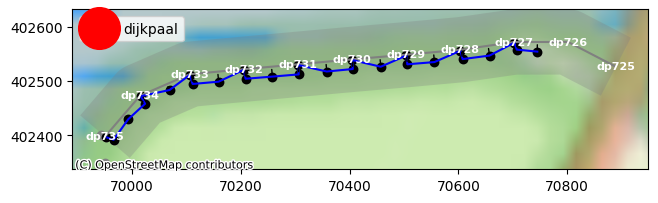

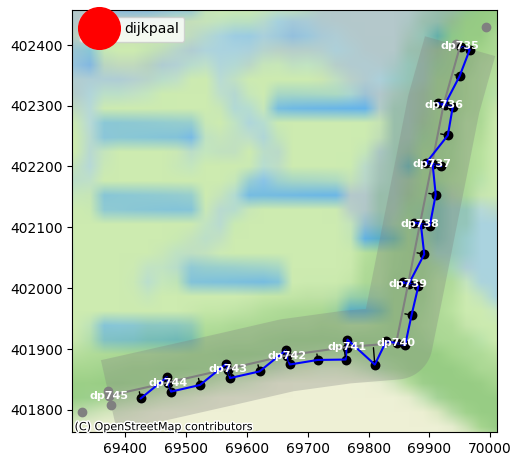

INFO:choreographer.utils._tmpfile:TemporaryDirectory.cleanup() worked.
INFO:choreographer.utils._tmpfile:shutil.rmtree worked.


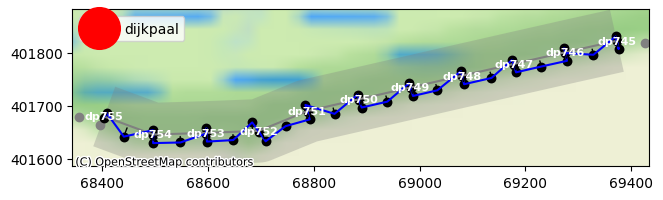

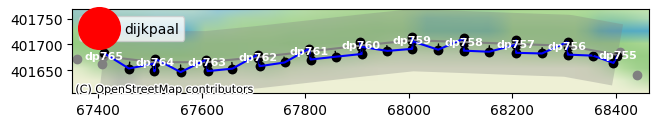

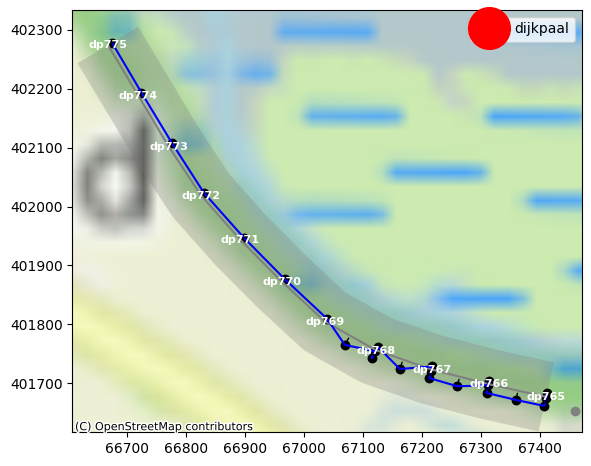

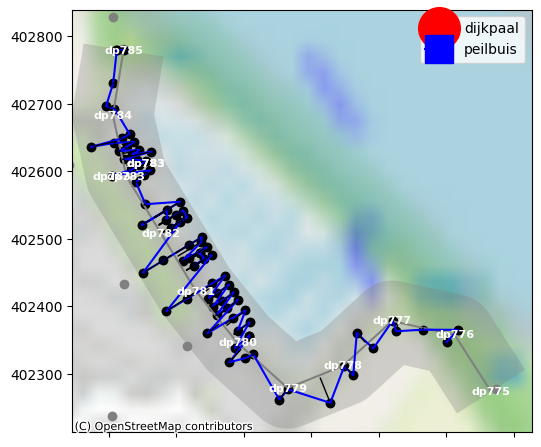

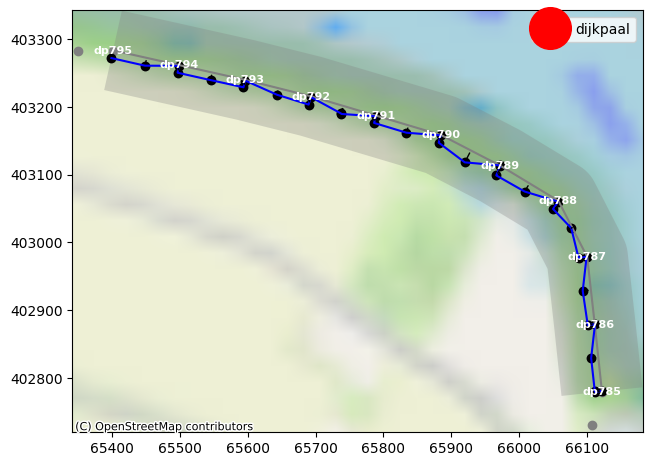

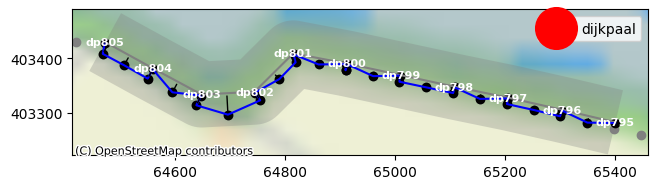

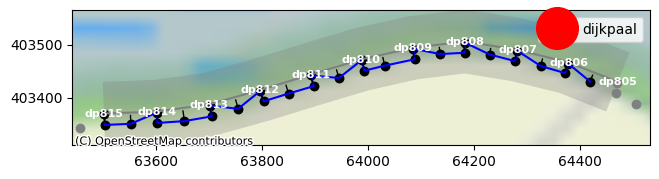

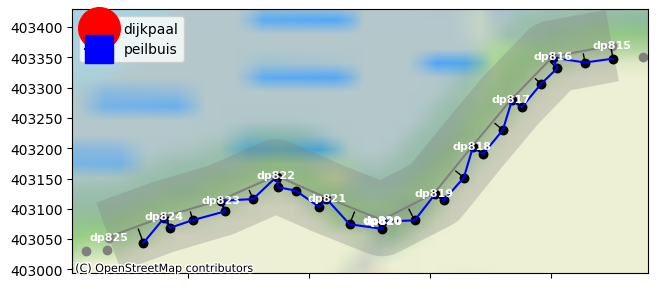

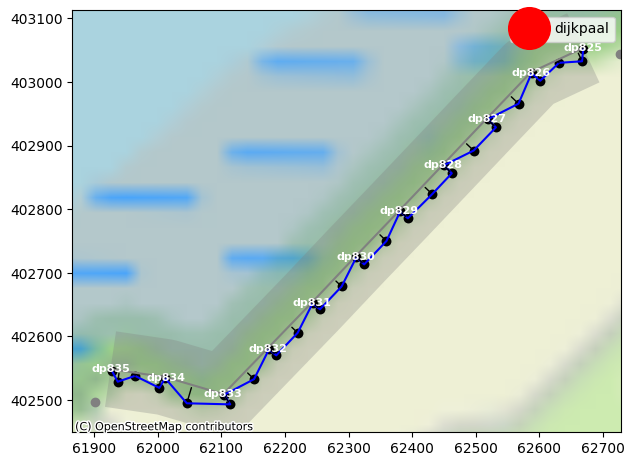

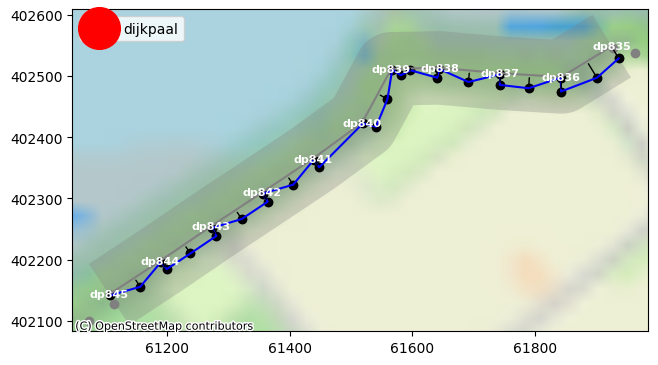

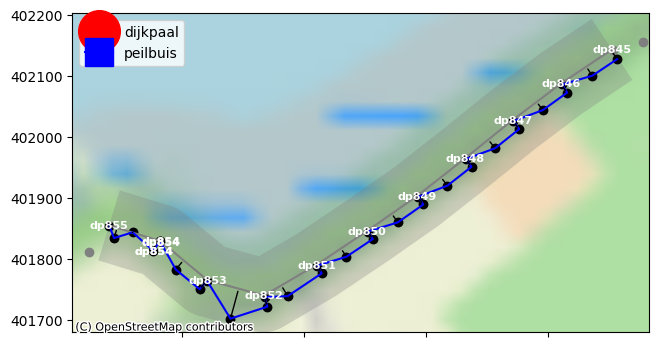

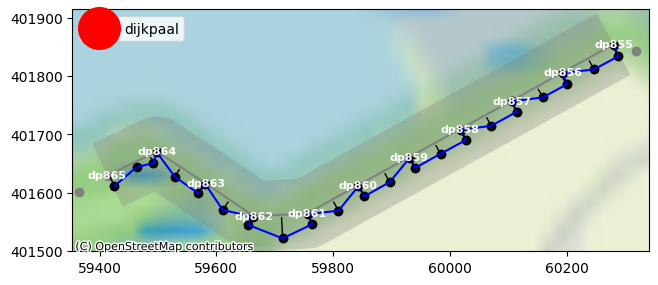

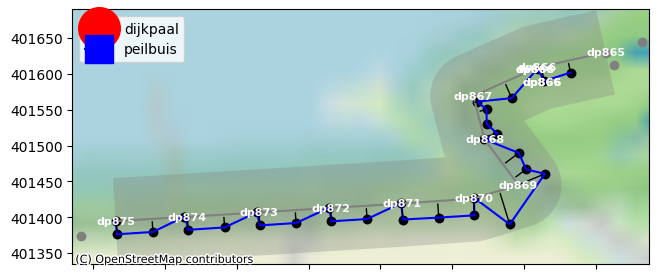

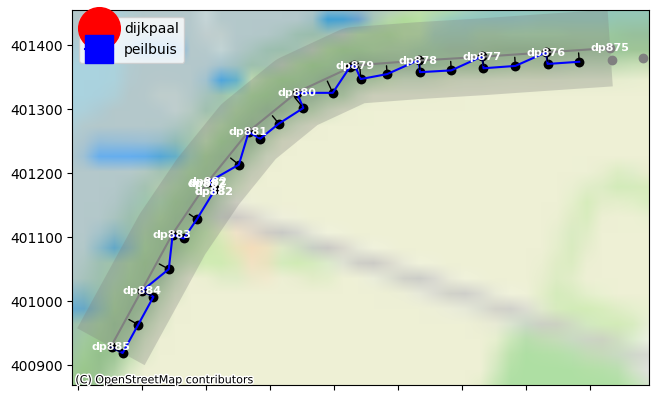

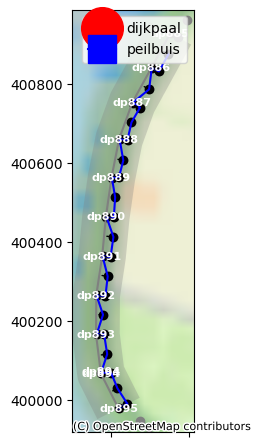

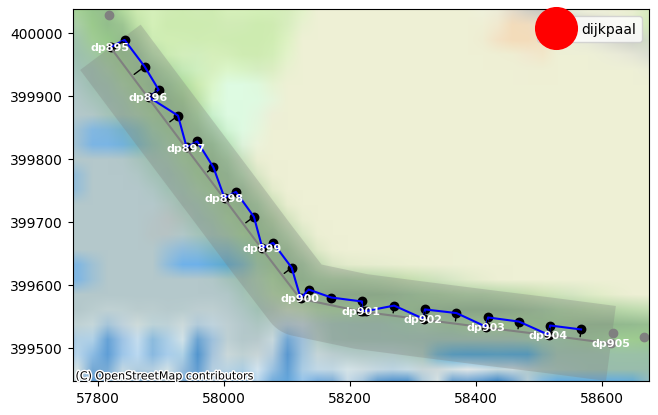

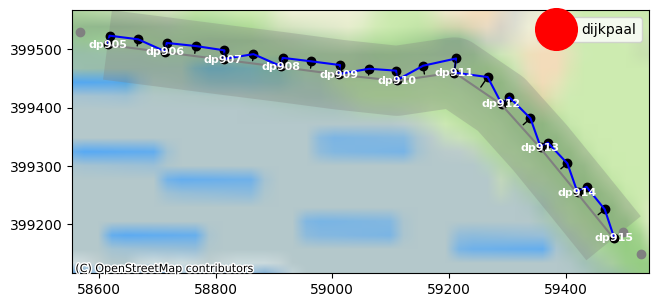

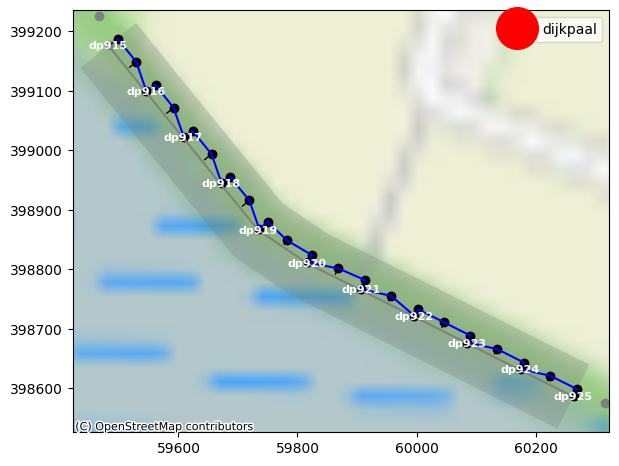

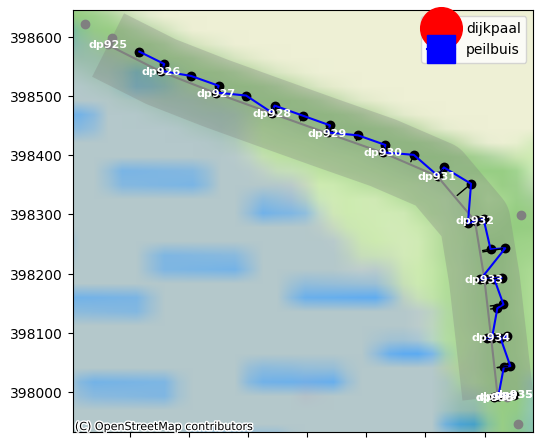

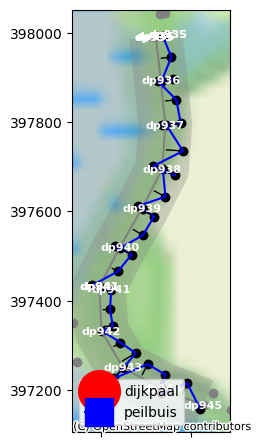

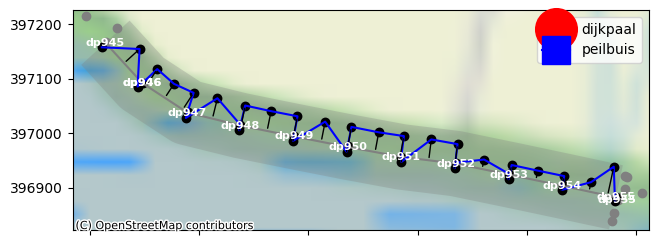

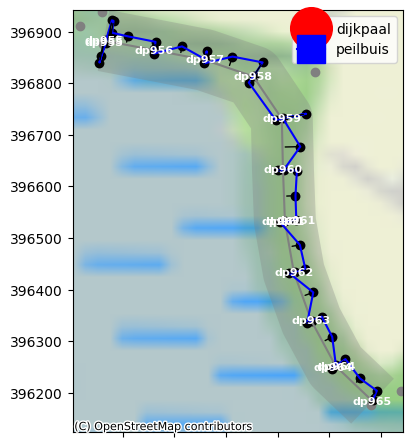

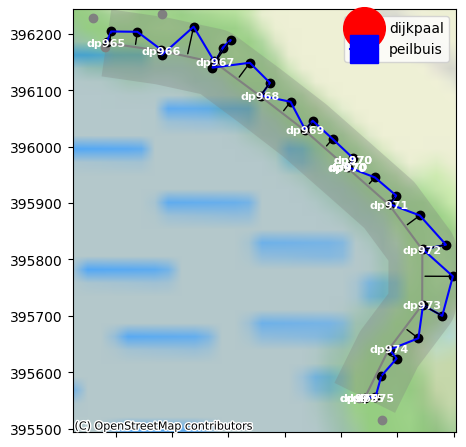

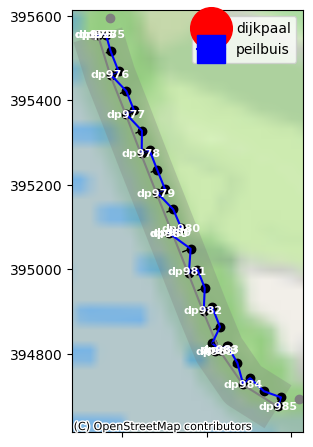

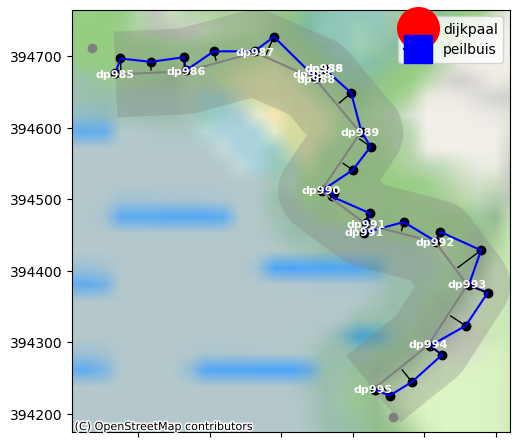

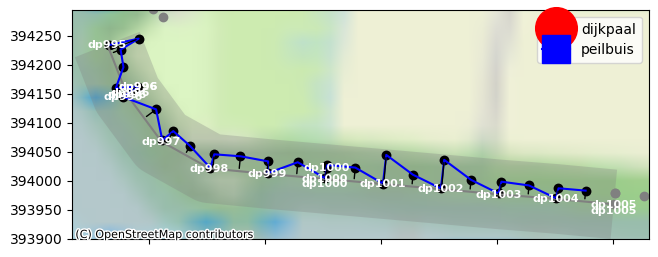

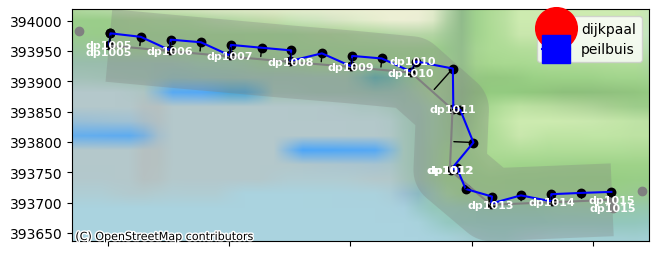

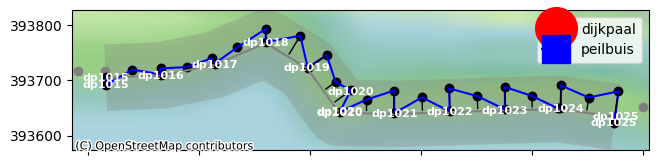

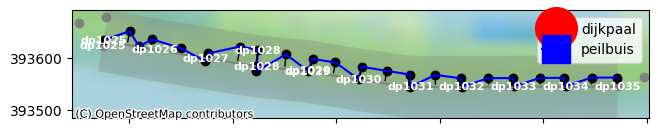

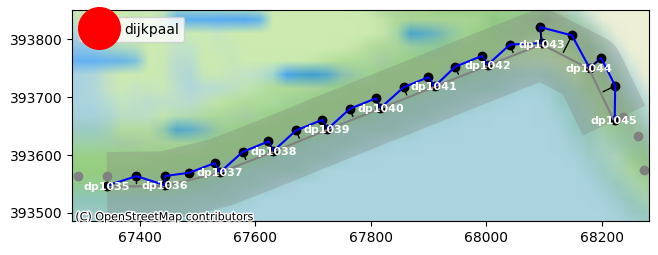

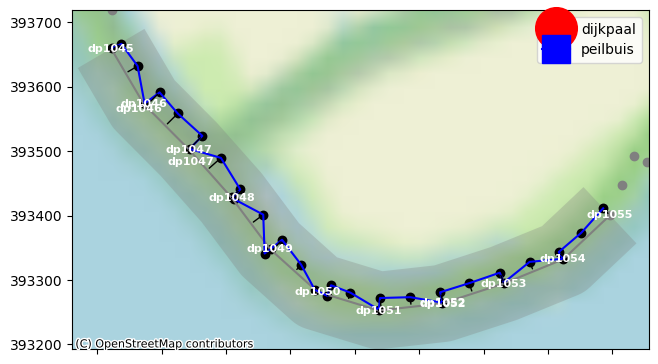

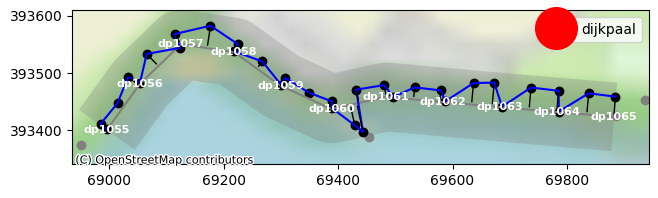

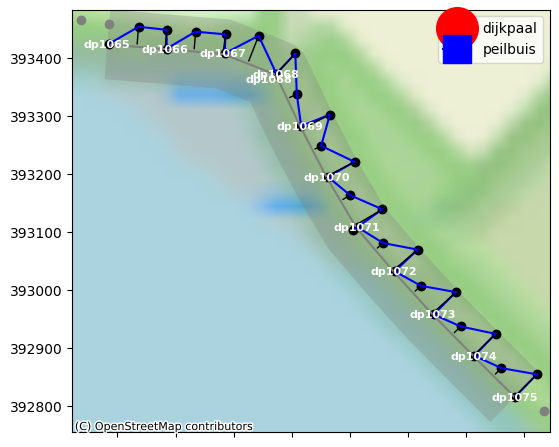

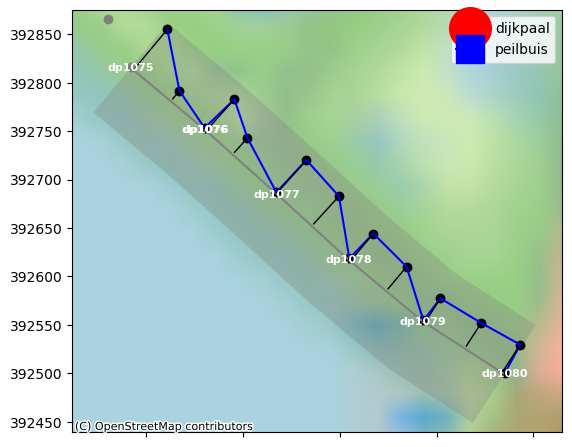

In [16]:
if 1:
    for dp_start in range(dp_min, dp_max+1, 10):
        dp_end = min(dp_start + 10, dp_max)
        dp_list = np.arange(dp_start, dp_end + 1)
        fig, profile = gl.plot_geoprofile(
            geoprofile_cols, 
            df_hm, 
            dp_list,
            oc_gwl=oc_gwl, 
            buffer=60, 
            projectname=f"Along levee {region} {min(dp_list)}-{max(dp_list)} {cpt_classification}",
            title_suffix='',
            plot_path=PLOT_PATH,
            auto_open=False)

In [16]:
# TODO: plotting of standpipes via oc_gwl is not working visible in maps. Annotation is plotted, legend as well. Standpipe itself not visible.

# Doorsnede maken bij dijkpaal

Een doorsnede haaks op de dijk, ter hoogte van een dijkpaal. Weergegeven wordt het beschikbare grondonderzoek, de dichtstbijzijnde versterkingstekening van de Deltaversterking, het actuele maaiveld profiel en de peilbuizen.

Informatie van meerdere dijkpalen wordt weergegeven wanneer de `delta_dp` variabele wort gebuikt. Informatie van lagere dijkpalen krijgt een rode tint, informatie van hogere dijkpalen een blauwe.

Grondonderzoek wordt geprojecteerd ten opzichte van de referentielijn. Het wordt nooit bovenopelkaargeplot. Dan krijgt het een offset. Die offset is weergegeven tussen de haakjes in het label. Grondonderzoek van de opgevraagde raai wordt als eerste geplot, en staat dus vrijwel altijd op de juiste plek.

In [17]:
dp_center = 725
delta_dp = 2

fig, fn = gl.create_figure_for_dp(
    dp_center, 
    df_section, 
    geoprofile_cols, 
    df_profile,
    oc_gwl,
    df_gmw=df_gmw,
    delta_dp=delta_dp,
    plot_gwl=True,
    plot_path=PLOT_PATH,
    ylims_upper=[-4, 7]
    )

DEBUG:root:Closest dp with Deltaversterking to 725 is 725.5, fn: es\dsn12_flipped.tif, x_offset: -8
DEBUG:root:Adding Deltaversterking background from 8\doorsnedes\dsn12_flipped.tif to figure at row 1, col 1.
DEBUG:root:Plotting column dp 726.6, distance=-23.5211947338196, plotted=[np.float64(-24.0)]
DEBUG:root:Plotting column dp 727.0, distance=-14.597415089285775, plotted=[np.float64(-24.0), np.float64(-15.0)]
DEBUG:root:Plotting column dp 727.0, distance=-1.3049853719405646, plotted=[np.float64(-24.0), np.float64(-15.0), np.float64(-1.0)]
DEBUG:root:Closest dp with surface level profile to 725 is 725.0
DEBUG:root:gmw worden geplot, aantal: 0
DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Loca

Section that includes no space behind and ahead.

In [18]:
fig, fn = gl.create_figure_for_dp(
    dp_center,
    df_section, 
    geoprofile_cols, 
    df_profile,
    oc_gwl,
    delta_dp=0,
    plot_path=PLOT_PATH,
    )

DEBUG:root:Closest dp with Deltaversterking to 725 is 725.5, fn: es\dsn12_flipped.tif, x_offset: -8


DEBUG:root:Adding Deltaversterking background from 8\doorsnedes\dsn12_flipped.tif to figure at row 1, col 1.
DEBUG:root:Closest dp with surface level profile to 725 is 725.0
DEBUG:root:gmw worden niet geplot
DEBUG:asyncio:Using selector: SelectSelector
INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
DEBUG:root:Looking for browser, skipping local? False
DEBUG:root:Looking for at local chrome download path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe
DEBUG:root:Local chrome not found at path: C:\Users\HMEUW\.conda\envs\wk20260129\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe.
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\HMEUW\AppData\Local\Temp\tmpo3rdhhgc.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp 

# Overview for standpipe analysis

Plot sections for all locations with a section or a standpipe

In [17]:
if 0:
    dp_section = df_section.loc[df_section.region == 'Os', 'dp'].values
else:
    dp_section = []
dp_section

[]

In [18]:
dp_obs = oc_gwl.loc[oc_gwl.region == 'Os', 'dp'].unique()
dp_obs.sort()
dp_obs

array([ 777.5,  781.5,  783. ,  784.4,  820. ,  854. ,  866. ,  882. ,
        894. ,  917.1,  930.5,  931.1,  935. ,  941. ,  946. ,  955. ,
        961. ,  964. ,  970. ,  975. ,  980. ,  982.8,  983. ,  988. ,
        991. ,  995.8,  996. , 1000. , 1005. , 1010. , 1012. , 1015. ,
       1020. , 1025. , 1028. , 1029. , 1046. , 1047. , 1052. , 1068. ,
       1076. ])

In [19]:
dp_gmw = df_gmw.loc[df_gmw.region == 'Os', 'dp'].unique()
dp_gmw = np.sort(dp_gmw)
dp_gmw

array([ 738.  ,  738.01,  748.99,  749.  ,  761.99,  762.  ,  772.  ,
        777.5 ,  777.51,  781.63,  781.65,  783.02,  783.11,  784.37,
        784.43,  789.01,  789.02,  792.99,  793.  ,  796.99,  819.99,
        853.98,  853.99,  866.03,  866.04,  868.67,  868.75,  869.56,
        869.93,  882.04,  882.06,  893.95,  894.  ,  917.06,  917.07,
        917.09,  930.5 ,  931.07,  934.99,  935.02,  940.99,  941.  ,
        945.99,  955.02,  961.  ,  963.99,  969.95,  969.99,  970.01,
        970.62,  971.05,  975.  ,  980.  ,  982.79,  982.99,  987.93,
        987.99,  991.  ,  995.79,  995.99,  997.  , 1000.  , 1000.02,
       1005.01, 1010.  , 1012.  , 1015.  , 1020.  , 1020.19, 1025.  ,
       1027.97, 1029.  , 1047.15, 1052.  , 1067.98, 1076.01])

In [20]:
all_dps = []
for dp in [dp_section, dp_obs, dp_gmw]:
    dp = np.round(dp).astype(int)
    dp = np.unique(dp)
    all_dps.append(dp)
# get unique values from all sublists in all_dps
unique_dps = np.unique(np.concatenate(all_dps))
unique_dps

array([ 738,  749,  762,  772,  778,  782,  783,  784,  789,  793,  797,
        820,  854,  866,  869,  870,  882,  894,  917,  930,  931,  935,
        941,  946,  955,  961,  964,  970,  971,  975,  980,  983,  988,
        991,  996,  997, 1000, 1005, 1010, 1012, 1015, 1020, 1025, 1028,
       1029, 1046, 1047, 1052, 1068, 1076])

In [21]:
# from unique_dps remove values that are within 1 unit from each other
final_dps = []
for dp in unique_dps:
    if len(final_dps) == 0:
        final_dps.append(dp)
    else:
        if dp - final_dps[-1] > 1:
            final_dps.append(dp)
final_dps[:5]

[np.int64(738), np.int64(749), np.int64(762), np.int64(772), np.int64(778)]

In [26]:
for dp_center in final_dps:
    delta_dp = 2

    fig, fn = gl.create_figure_for_dp(
        dp_center, 
        df_section, 
        geoprofile_cols, 
        df_profile,
        oc_gwl,
        df_gmw=df_gmw,
        delta_dp=delta_dp,
        plot_gwl=True,
        plot_path=PLOT_PATH,
        ylims_upper=[-4, 7],
        auto_open=False,
        )

DEBUG:root:Closest dp with Deltaversterking to 726 is 725.5, fn: es\dsn12_flipped.tif, x_offset: -8


DEBUG:root:Adding Deltaversterking background from 8\doorsnedes\dsn12_flipped.tif to figure at row 1, col 1.
DEBUG:root:Plotting column dp 726.6, distance=-23.5211947338196, plotted=[np.float64(-24.0)]
DEBUG:root:Plotting column dp 727.0, distance=-14.597415089285775, plotted=[np.float64(-24.0), np.float64(-15.0)]
DEBUG:root:Plotting column dp 727.0, distance=-1.3049853719405646, plotted=[np.float64(-24.0), np.float64(-15.0), np.float64(-1.0)]
DEBUG:root:Plotting column dp 727.5, distance=-15.691721028034044, plotted=[np.float64(-24.0), np.float64(-15.0), np.float64(-1.0), np.float64(-16.0)]
INFO:choreographer.utils._tmpfile:TemporaryDirectory.cleanup() worked.
INFO:choreographer.utils._tmpfile:shutil.rmtree worked.
DEBUG:root:Plotting column dp 728.0, distance=-17.463781151908744, plotted=[np.float64(-24.0), np.float64(-15.0), np.float64(-1.0), np.float64(-16.0), np.float64(-17.0)]
DEBUG:root:Plotting column dp 728.0, distance=-1.6961698947073327, plotted=[np.float64(-24.0), np.float6

Section without depth limit on y-axis.

In [22]:
for dp_center in final_dps:
    delta_dp = 2

    fig, fn = gl.create_figure_for_dp(
        dp_center, 
        df_section, 
        geoprofile_cols, 
        df_profile,
        oc_gwl,
        df_gmw=df_gmw,
        delta_dp=delta_dp,
        plot_gwl=False,
        plot_path=PLOT_PATH,
        #ylims_upper=[-4, 7],
        auto_open=False,
        
        )

DEBUG:root:Closest dp with Deltaversterking to 738 is 736.5, fn: des\dsn9_flipped.tif, x_offset: -5
DEBUG:root:Adding Deltaversterking background from 78\doorsnedes\dsn9_flipped.tif to figure at row 1, col 1.
DEBUG:root:Plotting column dp 738.0, distance=-16.392516335839755, plotted=[np.float64(-16.0)]
DEBUG:root:Plotting column dp 738.0, distance=9.279222057192387, plotted=[np.float64(-16.0), np.float64(9.0)]
DEBUG:root:Plotting column dp 738.0, distance=-1.4045167713055517, plotted=[np.float64(-16.0), np.float64(9.0), np.float64(-1.0)]
DEBUG:root:Plotting column dp 737.5, distance=-16.151261177523427, plotted=[np.float64(-16.0), np.float64(9.0), np.float64(-1.0), np.float64(-17.0)]
DEBUG:root:Plotting column dp 738.5, distance=-16.48225691616399, plotted=[np.float64(-16.0), np.float64(9.0), np.float64(-1.0), np.float64(-17.0), np.float64(-15.0)]
DEBUG:root:Plotting column dp 737.0, distance=-15.703149688761986, plotted=[np.float64(-16.0), np.float64(9.0), np.float64(-1.0), np.float64

Verschuiving proberen

In [ ]:
dp_fig = 736.5
dp_center = 736
fn = df_section.loc[df_section.dp == dp_fig, 'dsn_file_tif'].values[0]

print(fn)
from plotly.subplots import make_subplots
import plotly.io as pio

figure = make_subplots(
        rows=1,
        cols=1,
        horizontal_spacing=0.01,
    )

gl.plot_deltaversterking_background(figure, fn, dp=None, fig_row=1, fig_col=1, x_offset=-5)

gl.select_and_plot_surfacelevelprofile(dp_center, figure, df_profile, delta_dp=0, region='Os', fig_row=1, fig_col=1)

figure.update_xaxes(range=[-30, 20], row=1, col=1)

pio.write_html(figure, file=r'c:\temp\test.html', auto_open=True)

DEBUG:root:Adding Deltaversterking background from 78\doorsnedes\dsn9_flipped.tif to figure at row 1, col 1.
DEBUG:root:Closest dp with surface level profile to 736 is 736.0


N27-2_data\\deltaversterking\os0725-0778\doorsnedes\dsn9_flipped.tif


In [ ]:
fn

'N27-2_data\\\\deltaversterking\\os0725-0778\\doorsnedes\\dsn12_flipped.tif'

In [ ]:
os.getcwd()

'c:\\data\\python\\cloned\\geolookup\\docs\\examples'